**2.** Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [1]:
# CODE taken from https://www.geeksforgeeks.org/stable-marriage-problem/ based on Gale–Shapley algorithm 

# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1, N): 
      
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
  
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer): 
    N = int(len(prefer)/2)  
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
  
    count = 0
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1, N) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
        count+=1
    # End of main while loop 
    return count

In [2]:
from itertools import permutations 
import random as r

prmt_1 = permutations([0, 1, 2, 3]) 
prmt_2 = permutations([4, 5, 6, 7]) 
permut_1 = list(prmt_1)
permut_2 = list(prmt_2)
n_permut = len(permut_1)

min:  4
max:  10
avg:  5.25


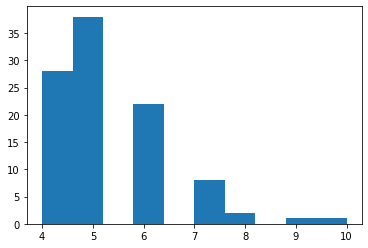

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# N = 4

iterations = [-1]*100
for n in range (100):
  prefer = [-1]*8
  for i in range (8):
    if (i<=3): prefer[i] = list(permut_2[r.randint(0,n_permut-1)])
    else: prefer[i] = list(permut_1[r.randint(0,n_permut-1)])
  iterations[n] = stableMarriage(prefer)
  
print("min: ", min(iterations))
print("max: ", max(iterations))
print("avg: ", sum(iterations)/len(iterations))

data = np.array(iterations)
plt.hist(data, bins = 10)
plt.show()

min:  40
max:  50
avg:  43.35


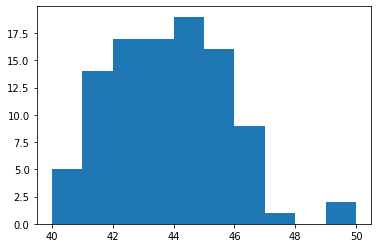

In [4]:
from itertools import islice

# N = 40

prmt_1 = permutations([i for i in range (40)]) 
prmt_2 = permutations([j for j in range (40, 80)]) 
permut_1 = list(islice(prmt_1,0,100000,10)) # due to the large number of permutations, we take just 10000 to do the test
permut_2 = list(islice(prmt_1,0,100000,10))
n_permut = len(permut_1)

iterations = [-1]*100
for n in range (100):
  prefer = [-1]*80
  for i in range (80):
    if (i<=3): prefer[i] = list(permut_2[r.randint(0,n_permut-1)])
    else: prefer[i] = list(permut_1[r.randint(0,n_permut-1)])
  iterations[n] = stableMarriage(prefer)
  
print("min: ", min(iterations))
print("max: ", max(iterations))
print("avg: ", sum(iterations)/len(iterations))

data = np.array(iterations)
plt.hist(data, bins = 10)
plt.show()